This notebook reproduces the plots shown in (insert link from arxiv). These plots represent the SOM of some Modified Gravity theories probed by cosmic shear.  

The training set is available under request (send email to agnes.ferte at jpl.nasa.gov) and this notebook assumes it is in the same directory.  

The MG theories considered here are f(R) gravity, dilaton and symmetron.  

In [1]:
import sompy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
CACHEDIR=/Users/aferte/.matplotlib
Using fontManager instance from /Users/aferte/.matplotlib/fontlist-v330.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# 1. Read training set

In [2]:
#Read xi_pm for all MG models
all_mg_data = np.load('som_mg_training_all_vfinale2.npy')

In [3]:
#Read the values of the MG parameters for each theory

#b0 values for f(R) gravity
fr_b0_all = np.load('som_mg_training_fr_b0_vfinale.npy')

#xi0 values for dilaton (beta0 = 2.2)
dil_xi0_beta22 = np.load('som_mg_training_dil_xi0_beta22_tightrange_vfinale.npy')

#xistar values for symmetron with betastar of 0.5, 1 and 1.5 (astar = 0.5) 
sym_xis_beta05 = np.load('som_mg_training_sym_xis_beta05_tightrange_vfinale.npy')
sym_xis_beta1  = np.load('som_mg_training_sym_xis_beta1_tightrange_vfinale.npy')
sym_xis_beta15 = np.load('som_mg_training_sym_xis_beta15_tightrange_vfinale.npy')


# 2. Train SOM 

In [4]:
#dimension of the 2D grid
som_size_x = 6
som_size_y = 6

In [5]:
som_mg = sompy.SOMFactory.build(all_mg_data, mapsize=[som_size_x,som_size_y], mapshape='planar', lattice='rect', initialization='pca') 
som_mg.train(n_job=4, shared_memory = 'no')

 Training...
 pca_linear_initialization took: 1.413000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.263000, quantization error: 7333.571836

 epoch: 2 ---> elapsed time:  0.149000, quantization error: 53.213521

 epoch: 3 ---> elapsed time:  0.143000, quantization error: 31.890314

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.149000, quantization error: 27.930432

 epoch: 2 ---> elapsed time:  0.150000, quantization error: 27.131113

 epoch: 3 ---> elapsed time:  0.141000, quantization error: 26.393298

 Final quantization error: 26.393298
 train took: 3.092000 seconds


# 3. Plot SOM 

In [6]:
#From BMU to coordinate x,y
som_xy = som_mg.bmu_ind_to_xy(som_mg.project_data(all_mg_data))
x,y = np.zeros(len(som_xy)),np.zeros(len(som_xy))

k=0
for i in som_xy:
    x[k]=i[0]
    y[k]=i[1]
    k+=1

#Initialize grid of density of models 
dens_all = np.zeros([som_size_x,som_size_y])
#Initialize grid of density of models per MG theories
dens_b0 = np.zeros([som_size_x,som_size_y])
dens_dil_xi0_beta22 = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta05  = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta1   = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta15  = np.zeros([som_size_x,som_size_y])
#Initialize grid of MG parameters values
som_b0             = np.zeros([som_size_x,som_size_y])
som_dil_xi0_beta22 = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta05  = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta1   = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta15  = np.zeros([som_size_x,som_size_y])



#number of models for each theory to index the grid. Not ideal, could use fancier code.
n_model = 100

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)

        #Grid of the number of models per cell
        dens_all[i,j] = (np.sum(cell_coord))
        
        dens_b0[i,j] = np.sum(cell_coord[:n_model])
        dens_dil_xi0_beta22[i,j] = np.sum(cell_coord[n_model:n_model*2])
        dens_sym_xi_beta05[i,j]  = np.sum(cell_coord[n_model*2:n_model*3])
        dens_sym_xi_beta1[i,j]   = np.sum(cell_coord[n_model*3:n_model*4])
        dens_sym_xi_beta15[i,j]  = np.sum(cell_coord[n_model*4:n_model*5])
  
        #Grid of median of MG values per cell
        som_b0[i,j]             = (np.median(fr_b0_all[cell_coord[:n_model]]))
        som_dil_xi0_beta22[i,j] = (np.median(dil_xi0_beta22[cell_coord[n_model:n_model*2]]))
        som_sym_xi_beta05[i,j]  = (np.median(sym_xis_beta05[cell_coord[n_model*2:n_model*3]]))
        som_sym_xi_beta1[i,j]   = (np.median(sym_xis_beta1[cell_coord[n_model*3:n_model*4]]))
        som_sym_xi_beta15[i,j]  = (np.median(sym_xis_beta15[cell_coord[n_model*4:n_model*5]]))
        
        
        

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
#To plot empty cells as white cells
dens_all[np.where(dens_all == 0.)] = float("NaN")


Plot the grid of number of models per cell - Figure 1 of the paper 

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:1207: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


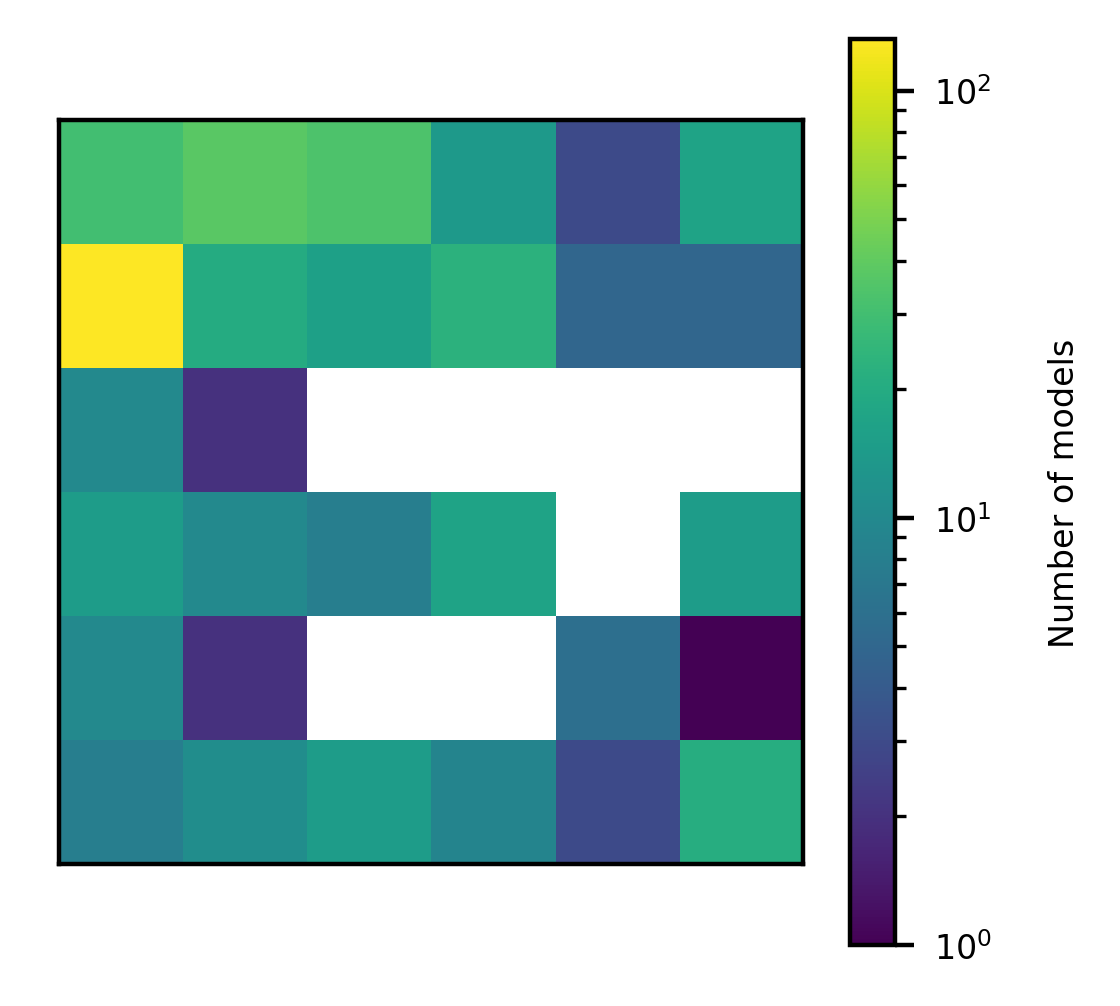

In [8]:
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_all, origin = 'lower',interpolation='none',norm=colors.LogNorm(vmin=np.nanmin(dens_all),vmax=np.nanmax(dens_all)))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar()
cb.set_label(label='Number of models', size=6,labelpad=10)
cb.ax.tick_params(labelsize=6)


Plot the grid of values of the MG parameters per cell - Figure 2 of the paper 

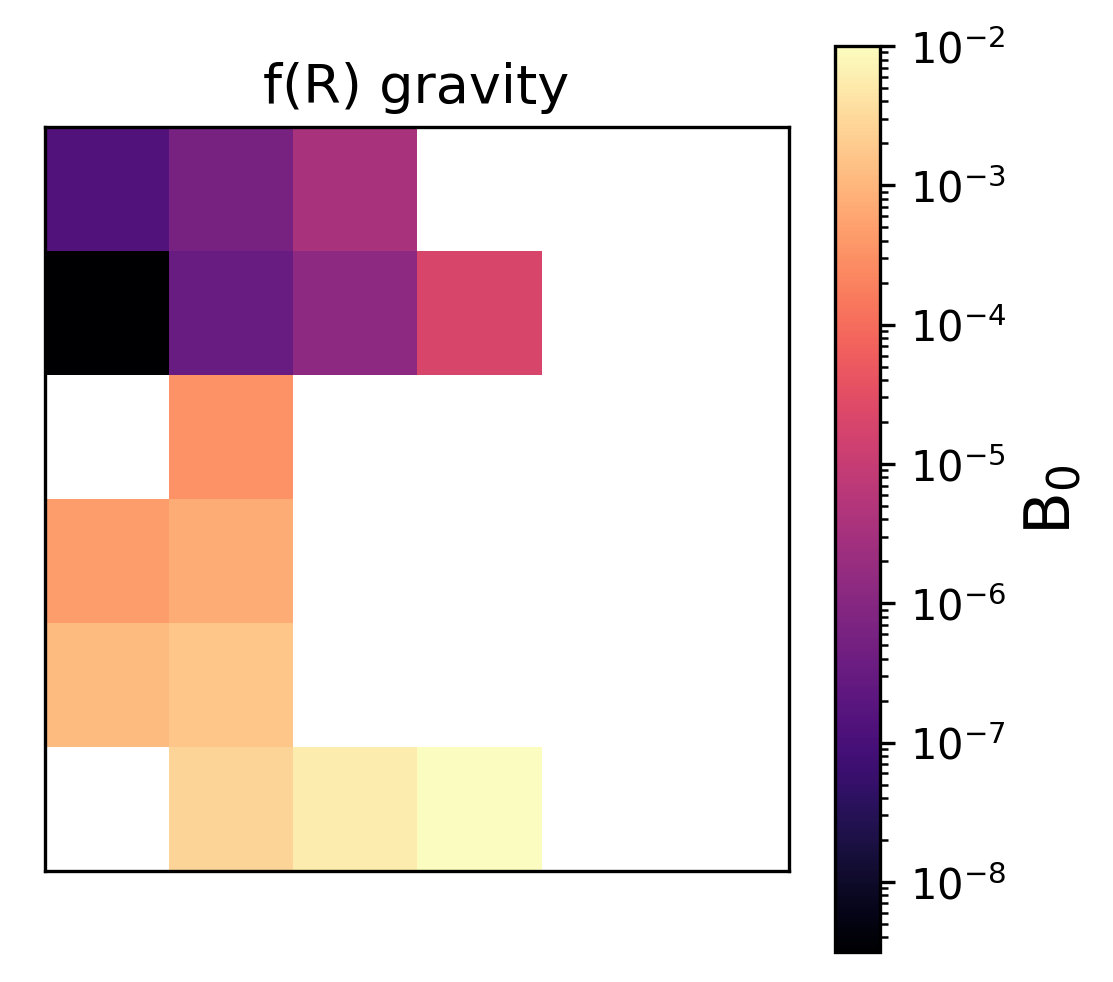

In [9]:
#f(R) gravity - top panel of Fig. 2
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_b0, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_b0), vmax=np.nanmax(som_b0)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title('f(R) gravity',size=13)
cb.set_label(r'$\rm B_{0}$', size=15,labelpad=4)


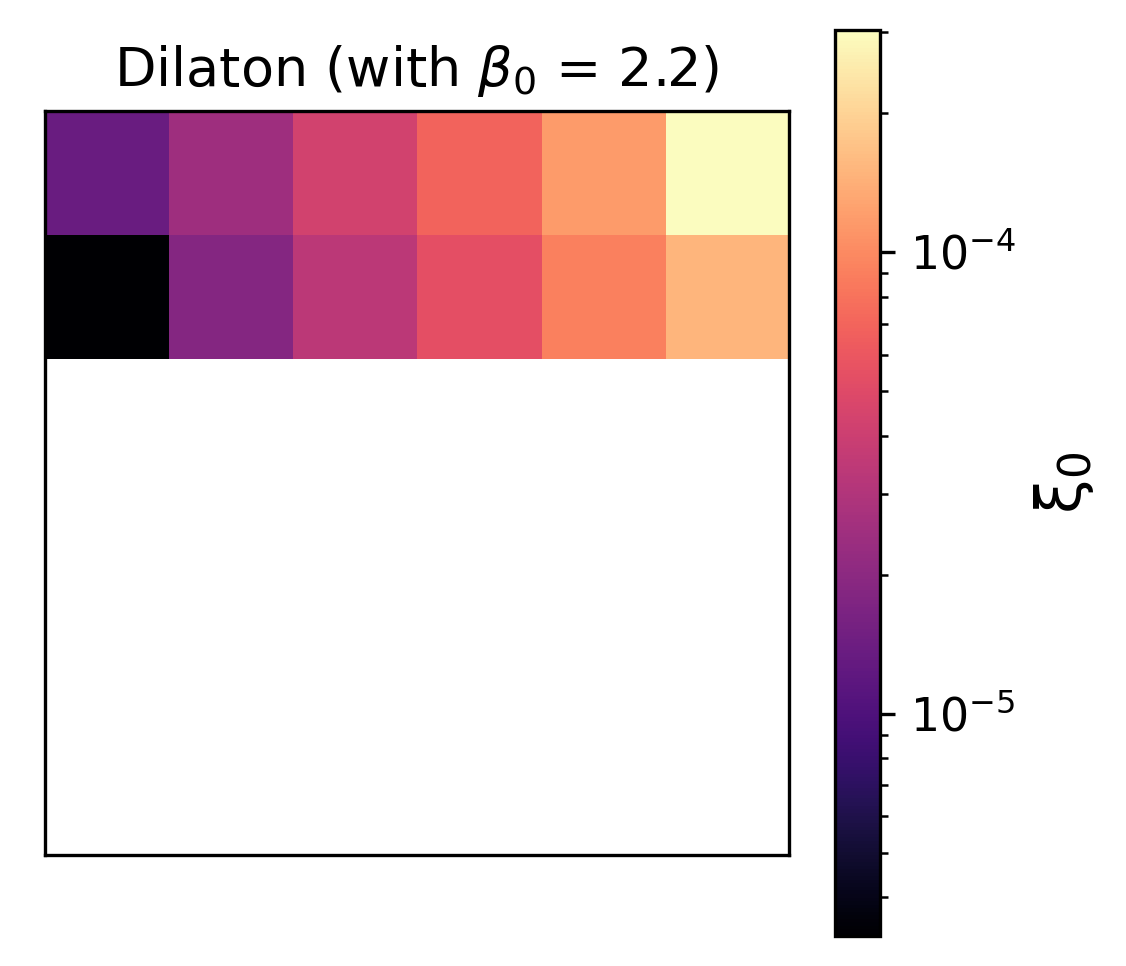

In [10]:
#Dilaton - middle panel of Fig. 2
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_dil_xi0_beta22, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_dil_xi0_beta22), vmax=np.nanmax(som_dil_xi0_beta22)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title(r'Dilaton (with $\beta_0$ = 2.2)',size=13)
cb.set_label(r'$\rm \xi_{0}$', size=15,labelpad=4)
cb.ax.tick_params(labelsize=11)


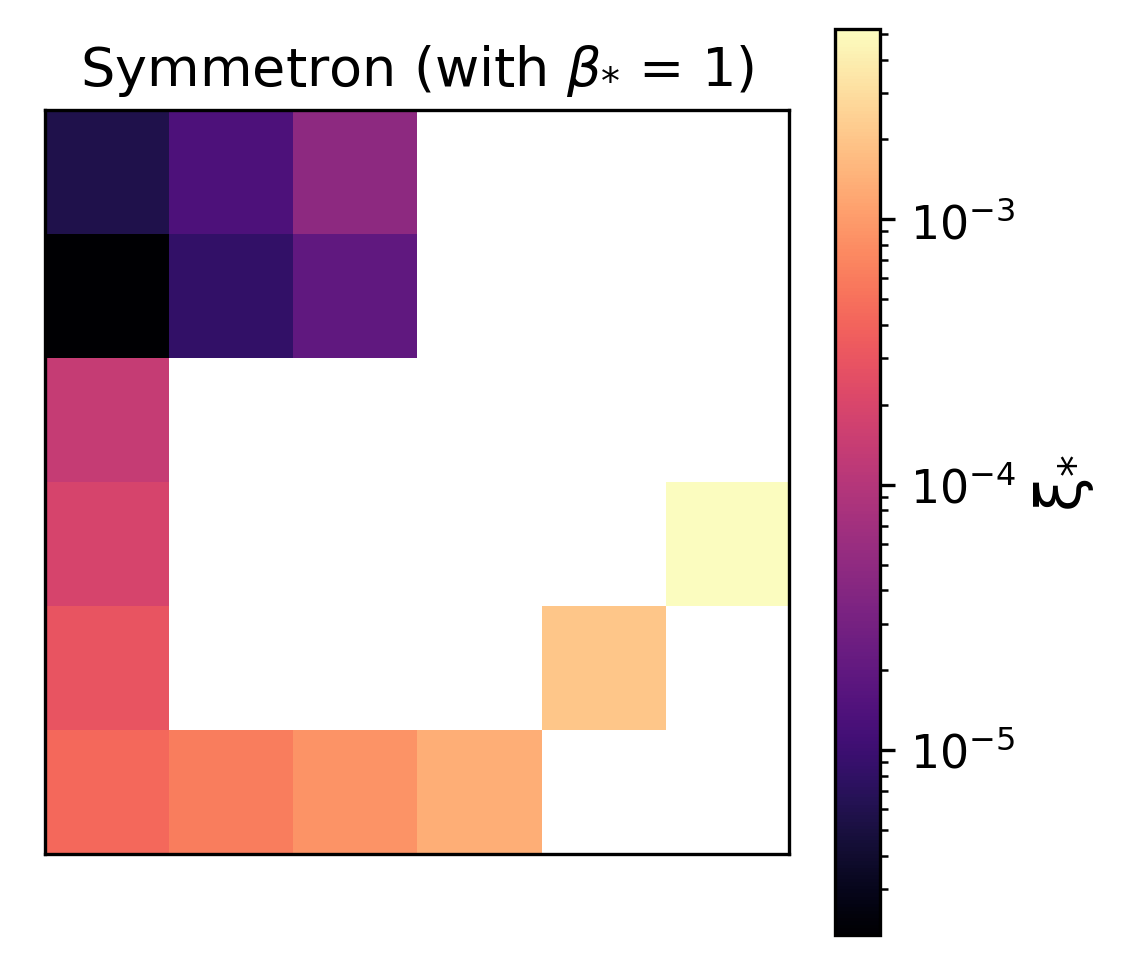

In [11]:
#Symmetron (only for beta_star = 1) - bottom panel of Fig. 2
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_sym_xi_beta1, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_sym_xi_beta1), vmax=np.nanmax(som_sym_xi_beta1)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title(r'Symmetron (with $\beta_{*}$ = 1)',size=13)
cb.set_label(r'$\rm \xi_{*}$', size=15,labelpad=4)
cb.ax.tick_params(labelsize=11)


# 4. Plot models 

Read all the correlation functions

In [17]:
models=np.zeros([som_size_x,som_size_y],dtype=object)
x,y = np.zeros(len(som_xy)),np.zeros(len(som_xy))
k=0

for i in som_xy:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    
for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        models[i,j]=(all_mg_data[cell_coord])

In [21]:
data_vector_median_somcell = np.zeros([som_size_x,som_size_y],dtype=object)
for i in range(som_size_x):
    for j in range(som_size_y):
        data_vector_median_somcell[i,j] = np.mean(models[i,j],axis=0 ,dtype=np.float64)
data_vector_median_somcell = np.array(data_vector_median_somcell)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Read theta values

In [18]:
theta = np.load('theta_xip.npy')

Plot xi_+^11 for selected models

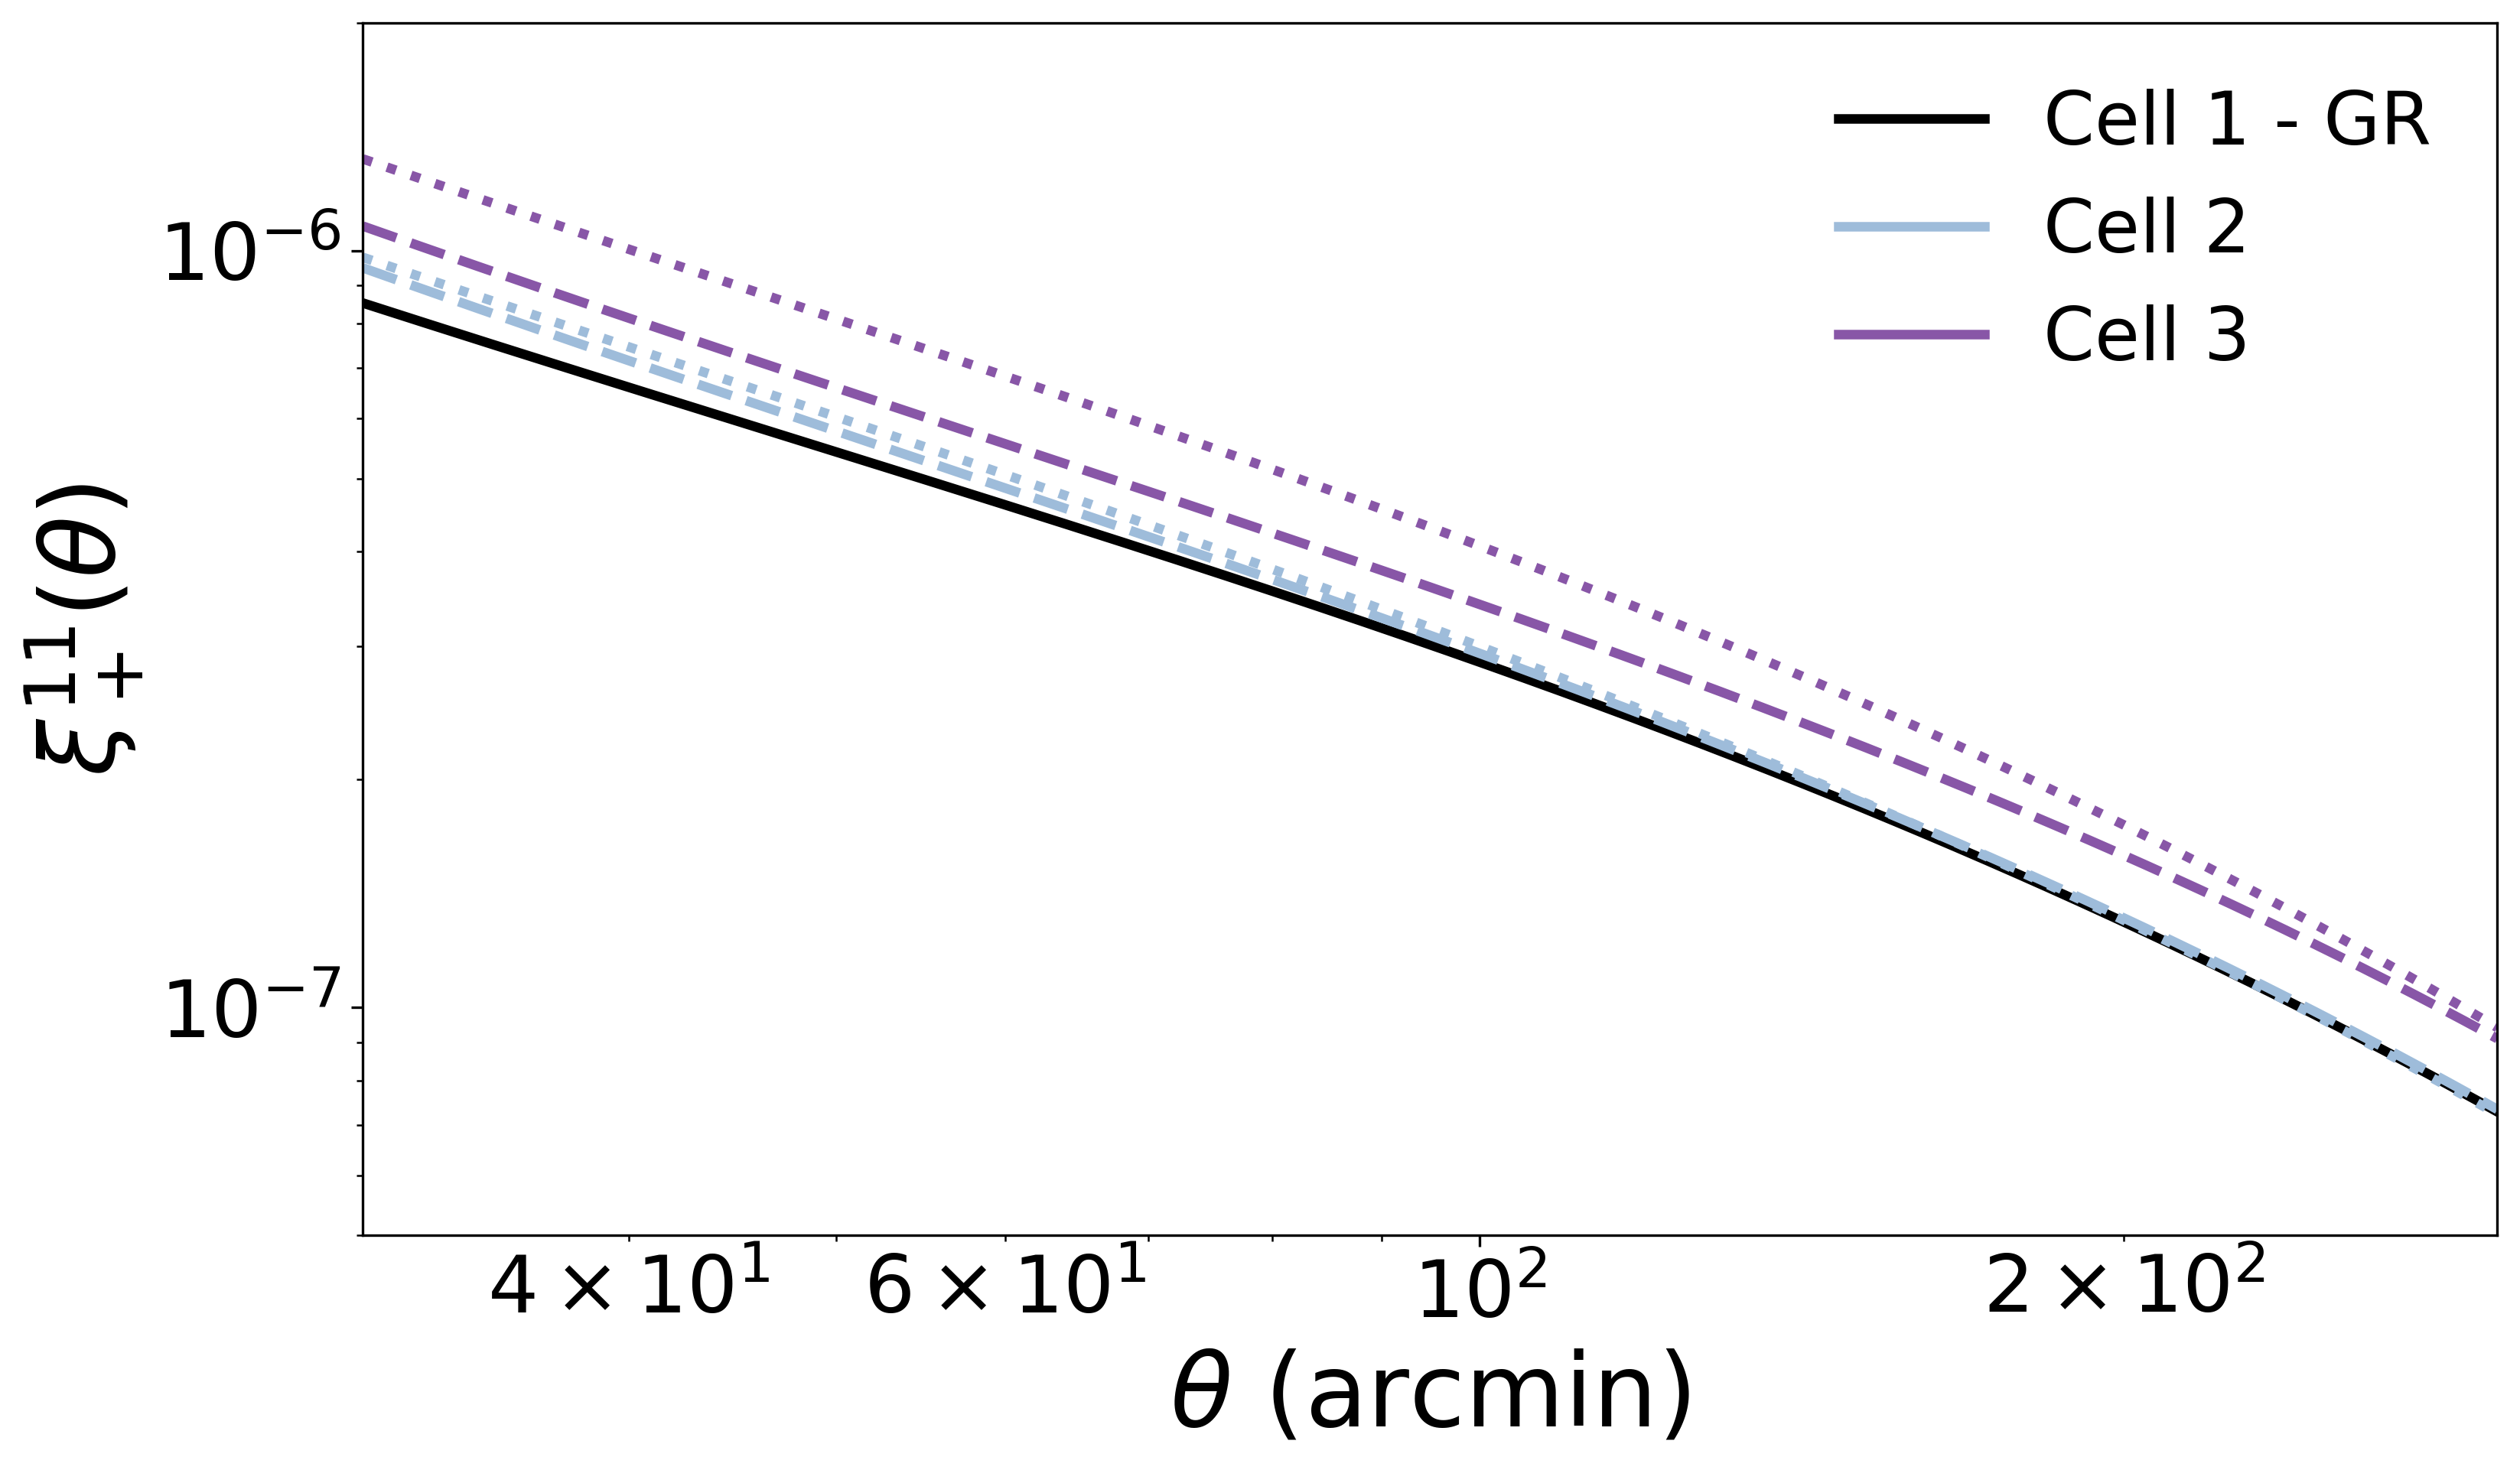

In [22]:
import matplotlib
plt.figure(figsize=(12,7),dpi=300)
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)


plt.plot(theta,data_vector_median_somcell[4,0][:765],label='Cell 1 - GR',color='black',linewidth=3)

plt.plot(1,1,label='Cell 2',color='#9ebcda',linewidth=3)
plt.plot(theta,models[2,0][0][:765],linestyle='dashed',color='#9ebcda',linewidth=3)
plt.plot(theta,models[2,0][14][:765],linestyle='dotted',color='#9ebcda',linewidth=3)

plt.plot(1,1,label='Cell 3',color='#8856a7',linewidth=3)
plt.plot(theta,models[0,5][0][:765],linestyle='dashed',color='#8856a7',linewidth=3)
plt.plot(theta,models[0,5][19][:765],linestyle='dotted',color='#8856a7',linewidth=3)


plt.ylim(5.*1e-8,2.*1e-6)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(theta),np.max(theta))
plt.xlabel(r'$\theta $ (arcmin)',fontsize=32)
plt.ylabel(r'$\xi^{11}_+(\theta)$',fontsize=32)
plt.legend(fontsize=23,frameon=False)



# 5. Application to (w0,wa) 

Read w0,wa models

In [28]:
w0wa_apriori = np.load('test_gr.npy') 

Read MG models 

In [24]:
fr_apriori    = np.load('som_mg_apriori_fr_vfinale.npy')
dil_apriori = np.load('som_mg_apriori_dilaton_vfinale.npy')
sym_apriori = np.load('som_mg_apriori_symmetron_vfinale.npy')
sym_apriori_05 = np.load('som_mg_apriori_symmetron_beta05_vfinale.npy')
sym_apriori_15 = np.load('som_mg_apriori_symmetron_beta15_vfinale.npy')

SOM and plots

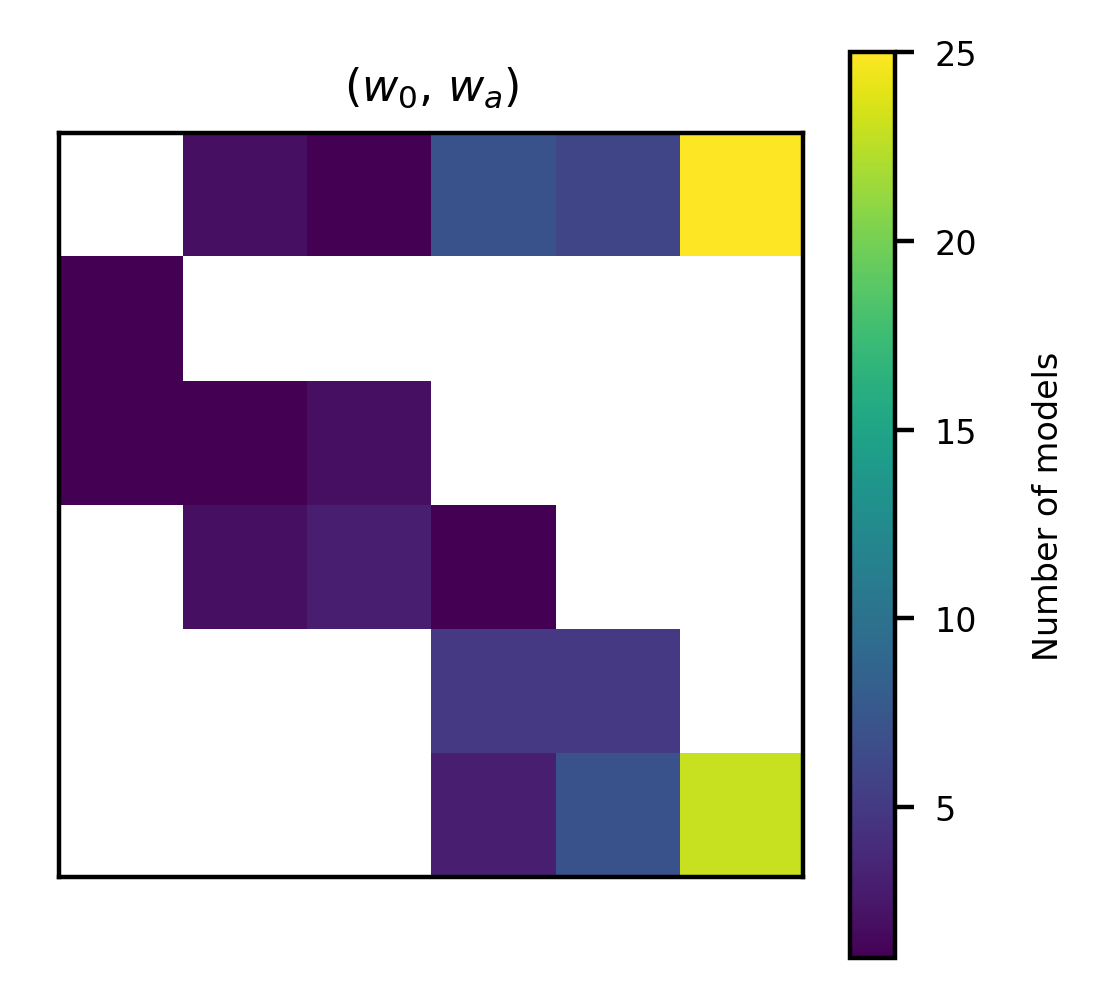

In [32]:
som_w0wa = som_mg.bmu_ind_to_xy(som_mg.project_data(w0wa_apriori))

x,y = np.zeros(len(som_w0wa)),np.zeros(len(som_w0wa))
k=0
for i in som_w0wa:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_w0wa = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_w0wa[i,j] = (np.sum(cell_coord))

dens_w0wa_apriori = np.copy(dens_w0wa)
dens_w0wa_apriori[np.where(dens_w0wa == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_w0wa_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
cb = plt.colorbar()
cb.set_label(label='Number of models', size=6,labelpad=10)
plt.title(r'($w_0$, $w_a$)', size=8)
cb.ax.tick_params(labelsize=6)

Text(0.5, 1.0, 'f(R) gravity')

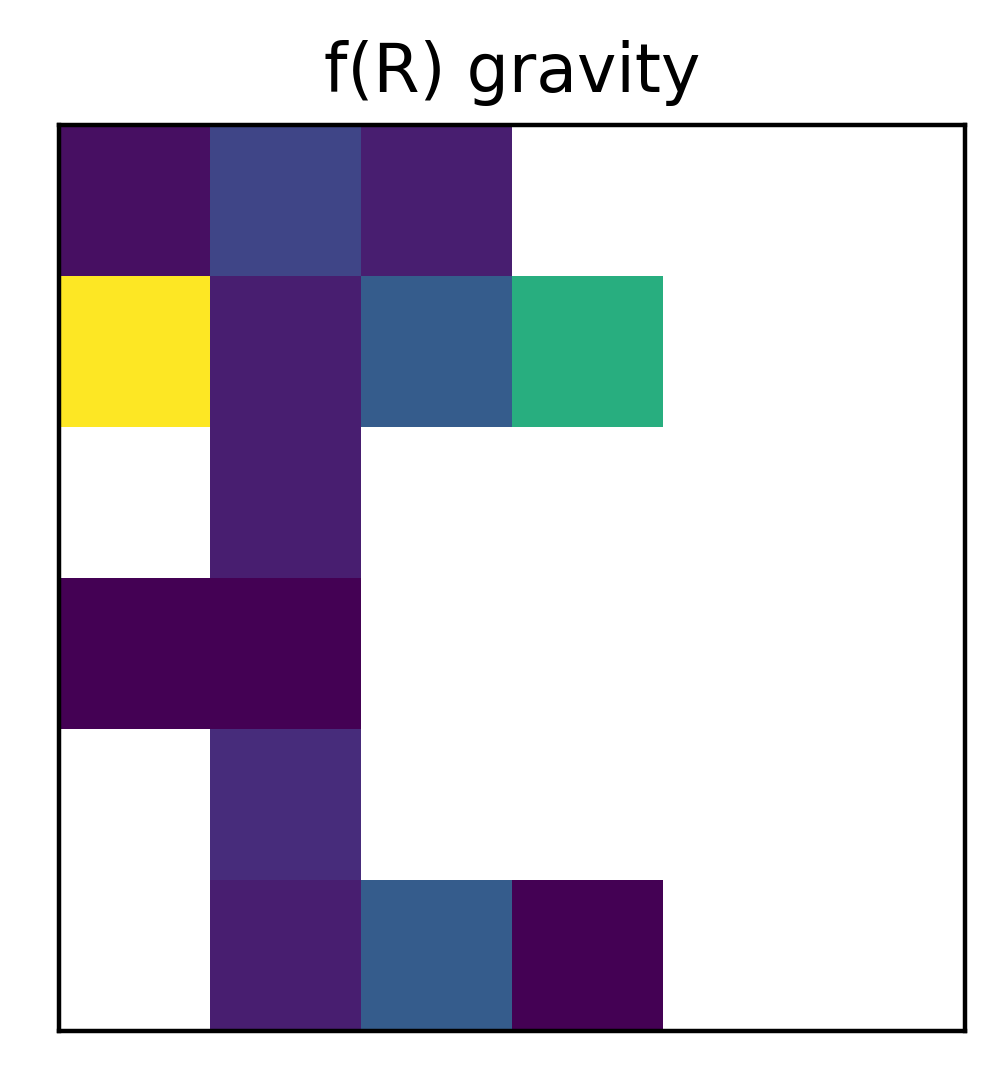

In [35]:
som_fr = som_mg.bmu_ind_to_xy(som_mg.project_data(fr_apriori))

x,y = np.zeros(len(som_fr)),np.zeros(len(som_fr))
k=0
for i in som_fr:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_fr = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_fr[i,j] = (np.sum(cell_coord))

dens_fr_apriori = np.copy(dens_fr)
dens_fr_apriori[np.where(dens_fr == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_fr_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('f(R) gravity',size=12)

Text(0.5, 1.0, 'Dilaton')

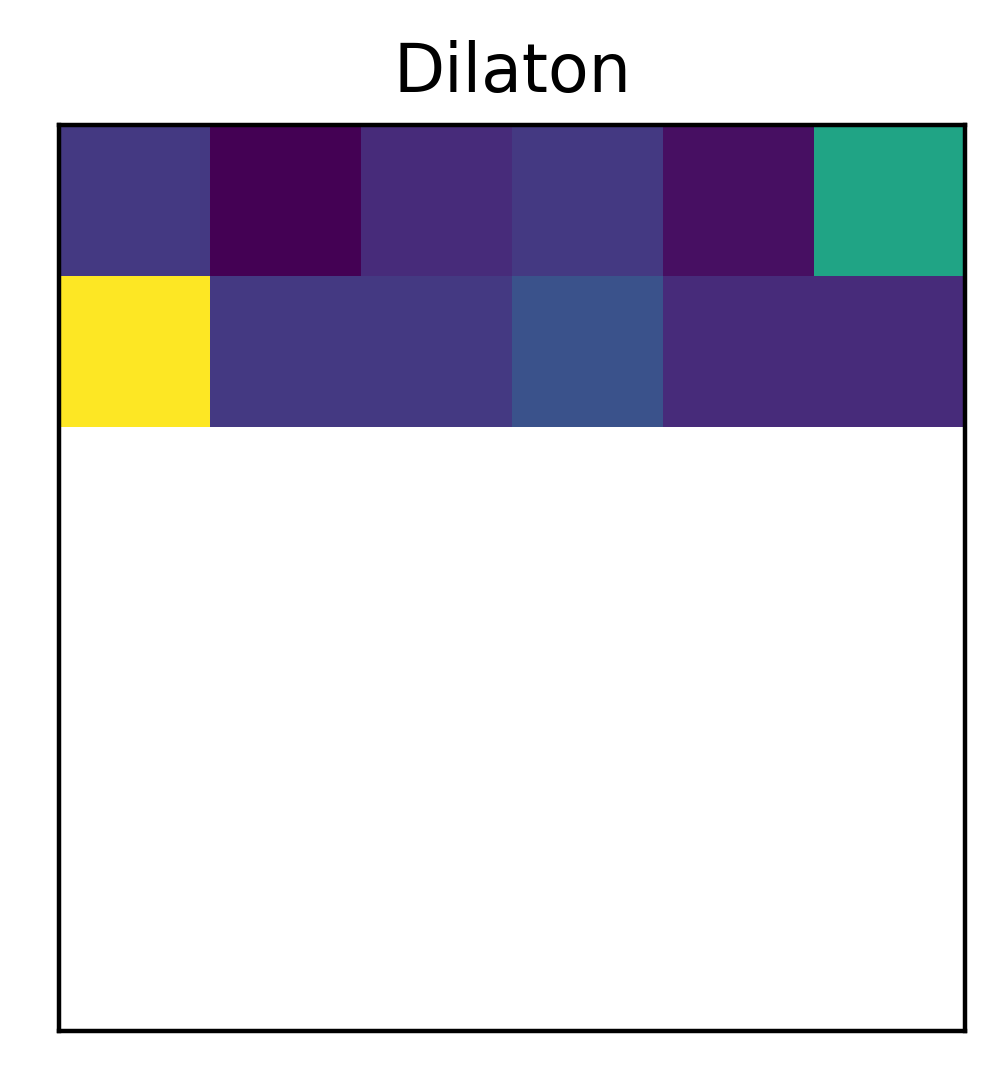

In [36]:
som_dil = som_mg.bmu_ind_to_xy(som_mg.project_data(dil_apriori))

x,y = np.zeros(len(som_dil)),np.zeros(len(som_dil))
k=0
for i in som_dil:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_dil = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_dil[i,j] = (np.sum(cell_coord))

dens_dil_apriori = np.copy(dens_dil)
dens_dil_apriori[np.where(dens_dil == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_dil_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('Dilaton',size=12)

Text(0.5, 1.0, 'Symmetron')

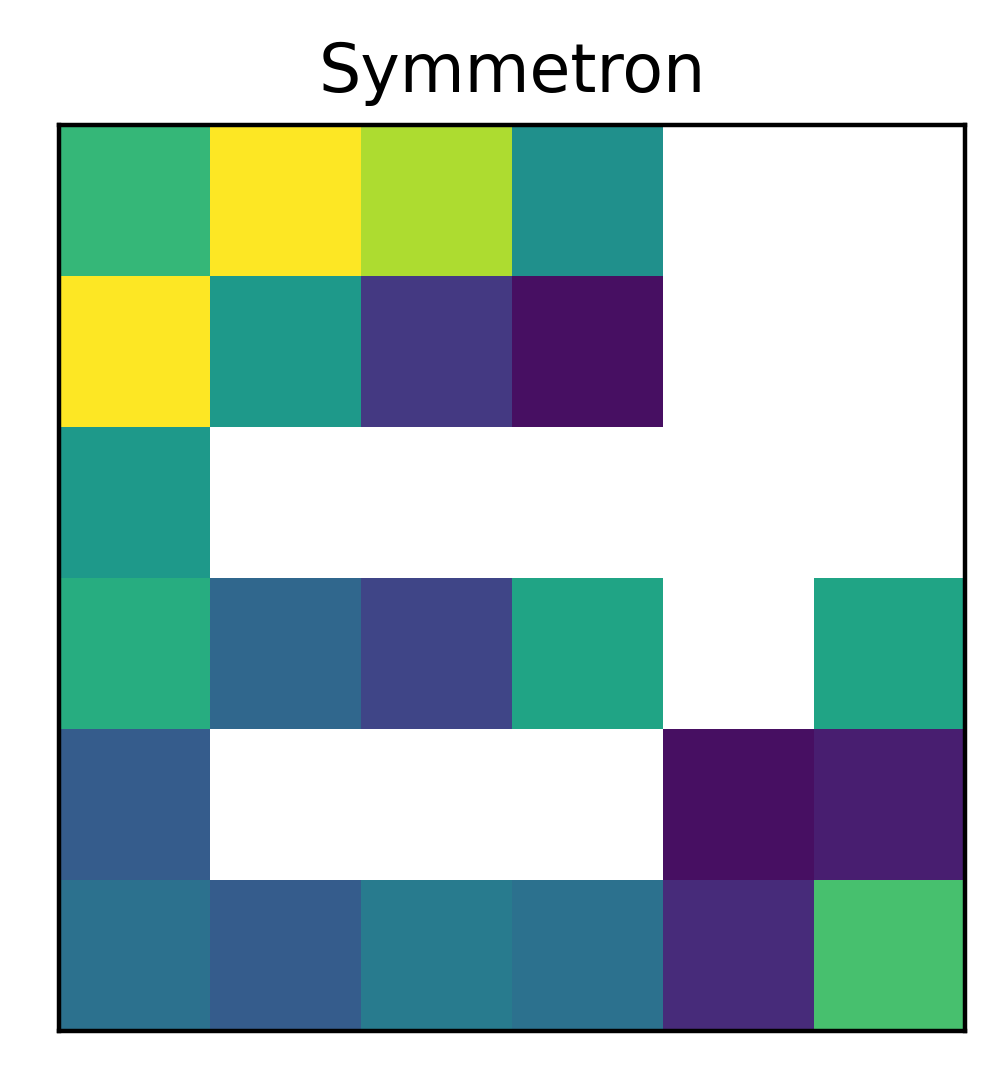

In [37]:
som_sym_beta05 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori_05))

x,y = np.zeros(len(som_sym_beta05)),np.zeros(len(som_sym_beta05))
k=0
for i in som_sym_beta05:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_sym05 = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym05[i,j] = (np.sum(cell_coord))
#########
som_sym_beta1 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori))

x,y = np.zeros(len(som_sym_beta1)),np.zeros(len(som_sym_beta1))
k=0
for i in som_sym_beta1:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_sym = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym[i,j] = (np.sum(cell_coord))        
#########
som_sym_beta15 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori_15))

x,y = np.zeros(len(som_sym_beta15)),np.zeros(len(som_sym_beta15))
k=0
for i in som_sym_beta15:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#density of models
dens_sym15 = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym15[i,j] = (np.sum(cell_coord))  

dens_sym_all = dens_sym05+dens_sym+dens_sym15
dens_sym_all_apriori = np.copy(dens_sym_all)
dens_sym_all_apriori[np.where(dens_sym_all == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_sym_all_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('Symmetron',size=12)